In [10]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

In [11]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_7 import full_scale_df_7 as full_scale_df

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [13]:
cols_to_drop = ['formula', 'trace', 'strategy']

In [14]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [15]:
final_df = clean_df(full_scale_df, cols_to_drop)

In [16]:
X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

### K-Neighbours Classifier

In [17]:
# K Neighbors Classifier
kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
kn_classifier.fit(X_train, y_train)

kn_classifier.score(X_test, y_test)

#y_pred = kn_classifier.predict(X_test)
#y_pred

0.9487787526677733

In [18]:
final_full_df = clean_df(full_scale_df, cols_to_drop)
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, TARGET)

kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
classifier = kn_classifier.fit(f_X_train, f_y_train)

mean_accuracy = classifier.score(f_X_test, f_y_test)
mean_accuracy

0.9487787526677733

In [19]:
pred_y = classifier.predict(f_X_test)
f1_score(pred_y, f_y_test, average=None)

array([0.92336271, 0.9608513 , 0.96212905])

## Regression

In [20]:
final_full_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,331,332,333,334,335,336,337,338,339,340
0,0,1,2,7,1.00,8,10,-3,-6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,7,1.00,8,10,-2,-7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,14,1.00,6,13,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,7,1.00,3,11,-4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,7,1.00,3,11,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,5175,6,22,42,2.93,256,13,5,-2,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15536,5176,6,38,74,3.18,373,13,5,5,-3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15537,5177,6,36,278,12.39,2873,4,5,11,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15538,5178,6,18,17,1.41,104,13,10,-6,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression - Progressions

In [21]:
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'nb_progressions')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)


-16112139.130425708

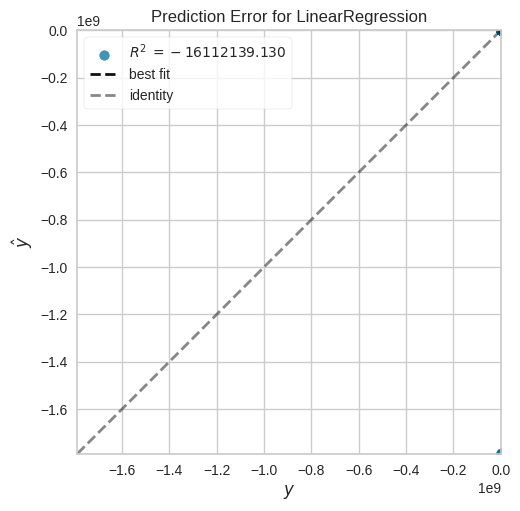

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


# sns.regplot(x="total_bill", y="tip", data=tips);

### SVM

In [23]:
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)

### Neural networks (MLPRegressor)

In [24]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6028789434452202

In [25]:
final_full_df


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,331,332,333,334,335,336,337,338,339,340
0,0,1,2,7,1.00,8,10,-3,-6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,7,1.00,8,10,-2,-7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,14,1.00,6,13,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,7,1.00,3,11,-4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,7,1.00,3,11,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,5175,6,22,42,2.93,256,13,5,-2,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15536,5176,6,38,74,3.18,373,13,5,5,-3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15537,5177,6,36,278,12.39,2873,4,5,11,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15538,5178,6,18,17,1.41,104,13,10,-6,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


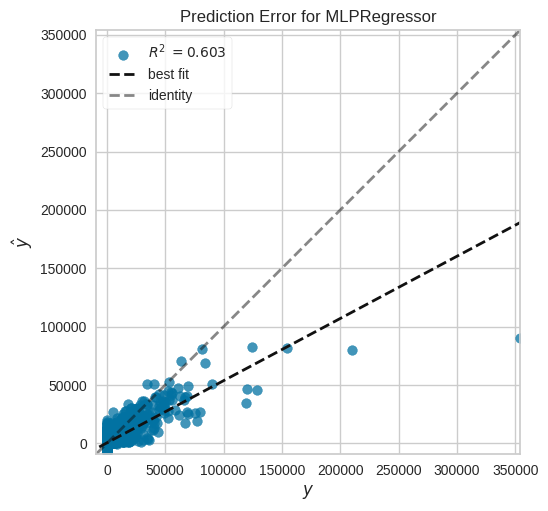

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [27]:
### Linear Regression - N. messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'num_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-6244009.684185158

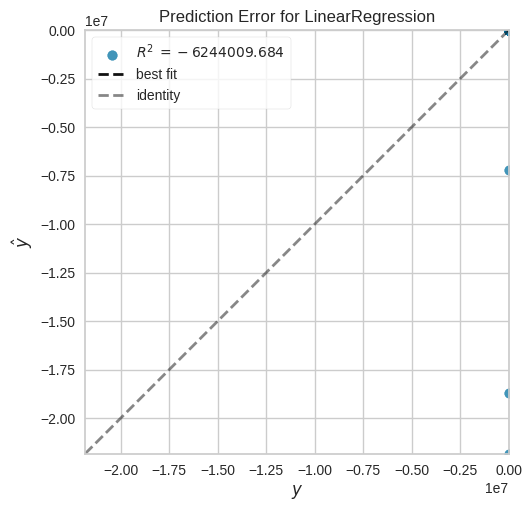

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [29]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)
final_full_df

/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,331,332,333,334,335,336,337,338,339,340
0,0,1,2,7,1.00,8,10,-3,-6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,7,1.00,8,10,-2,-7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,14,1.00,6,13,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,7,1.00,3,11,-4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,7,1.00,3,11,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,5175,6,22,42,2.93,256,13,5,-2,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15536,5176,6,38,74,3.18,373,13,5,5,-3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15537,5177,6,36,278,12.39,2873,4,5,11,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15538,5178,6,18,17,1.41,104,13,10,-6,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


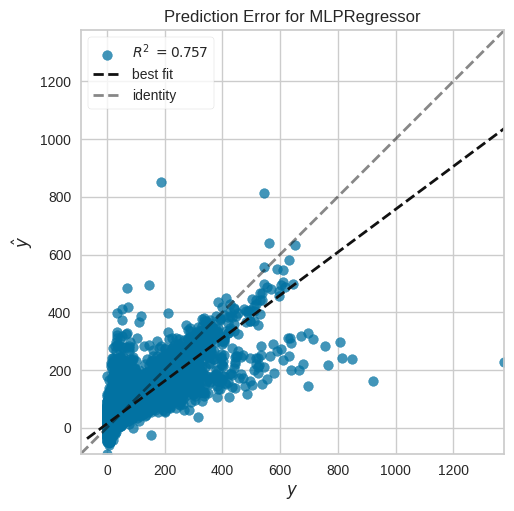

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [31]:
### Linear Regression - Size of the messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'size_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-4541.14411780639

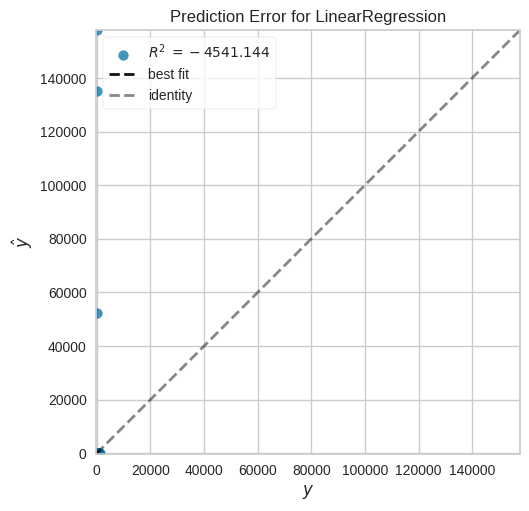

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)

In [33]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)


/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8974964575361645

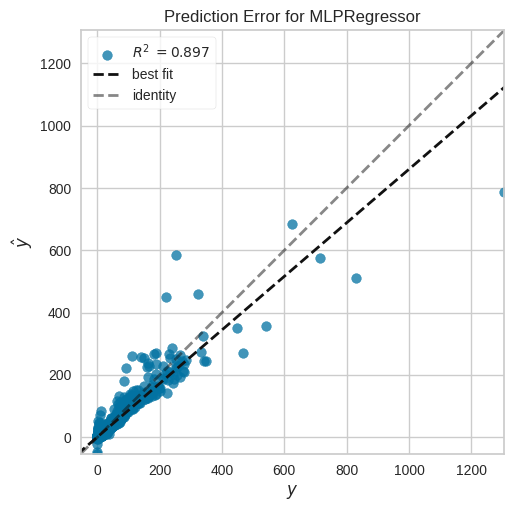

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [35]:
### Linear Regression - Trace length
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'trace_len')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-1350169.1484664772

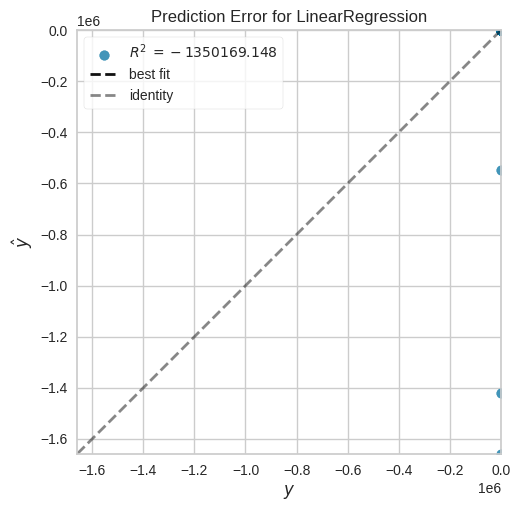

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [37]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)


0.9384745315129299

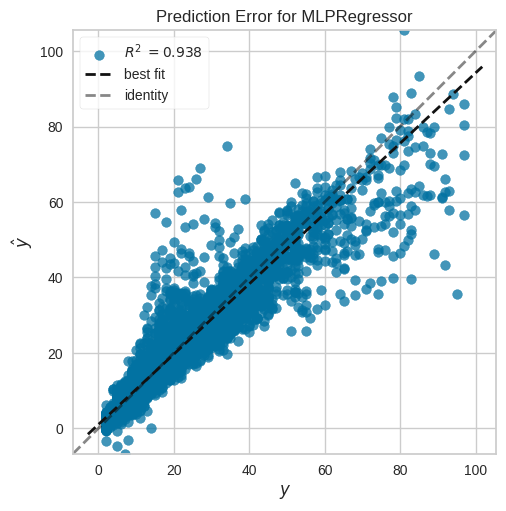

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure
